#Machine Learning Project


In [ ]:
# import all the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import torch
import numpy as np

import xgboost as xgb
from scipy import sparse
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Dataset link: https://www.kaggle.com/competitions/DontGetKicked/data
data=pd.read_csv("Dataset.csv")
data.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [ ]:
summary_stats = data.describe()

In [ ]:
null_counts = data.isnull().sum()

# Print the counts
print(null_counts)

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

###Handling Null or Missing Values

In [ ]:
import pandas as pd


# 1. Dropping columns with a high number of missing values
data.drop(['PRIMEUNIT', 'AUCGUART'], axis=1, inplace=True)

# 2. Dropping rows where there are missing values in specific columns
columns_to_dropna = ['SubModel', 'Color', 'Transmission', 'Nationality', 'Size', 'TopThreeAmericanName']
data.dropna(subset=columns_to_dropna, inplace=True)

# 3. Imputation
# For numeric columns, use median
numeric_columns = ['WheelTypeID',
                   'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                   'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                   'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                   'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

for col in numeric_columns:
    data[col].fillna(data[col].median(), inplace=True)

# For categorical columns, use mode
categorical_columns = ['Trim', 'WheelType']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Checking for any remaining missing values
remaining_missing_values = data.isnull().sum()
print(remaining_missing_values[remaining_missing_values >  0])

# Continue with your analysis...


Series([], dtype: int64)


In [ ]:
null_counts = data.isnull().sum()

# Print the counts
print(null_counts)

RefId                                0
IsBadBuy                             0
PurchDate                            0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPric

MIssing and Null Values are removed.

#Exploratory data analysis


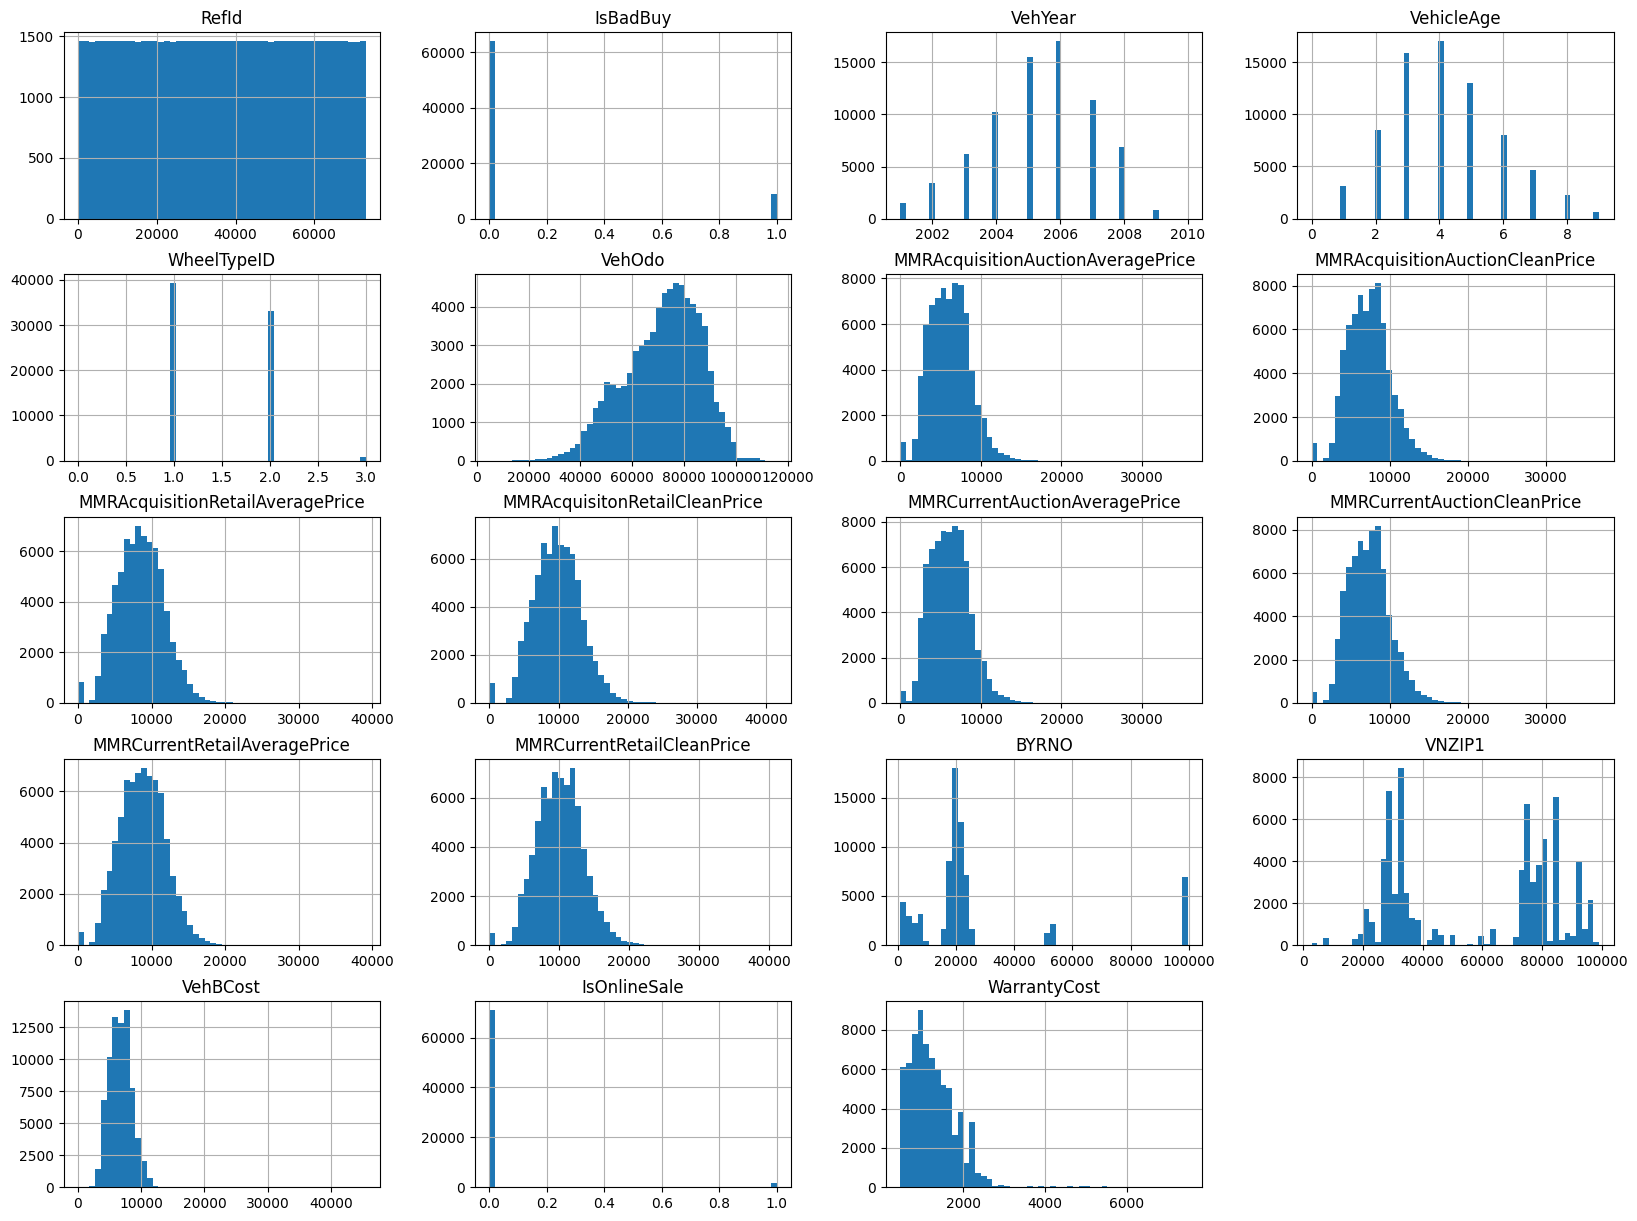

In [ ]:
#Exploratory data analysis

# Histograms
data.hist(bins=50, figsize=(20,15))
plt.show()


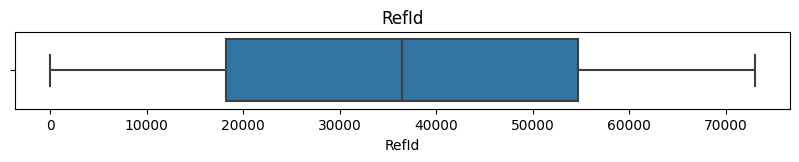

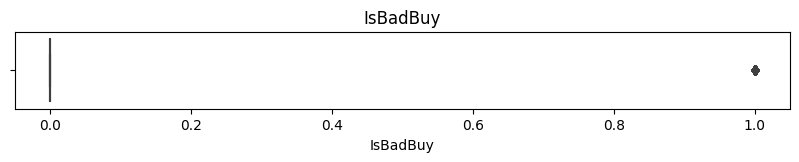

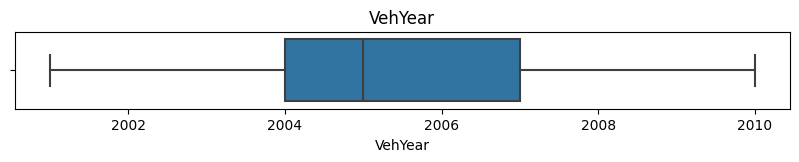

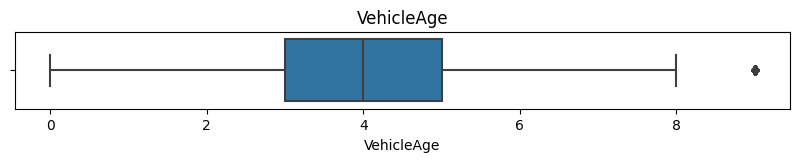

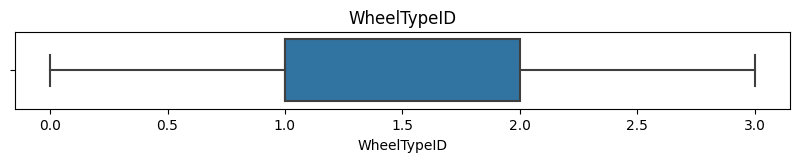

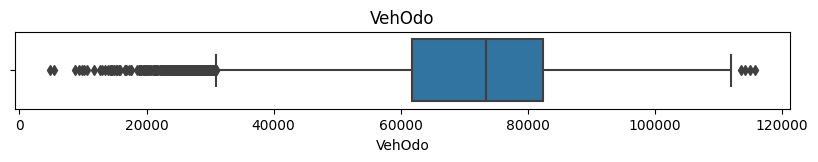

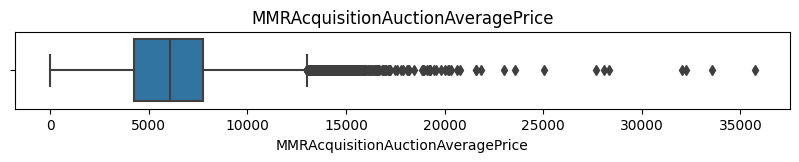

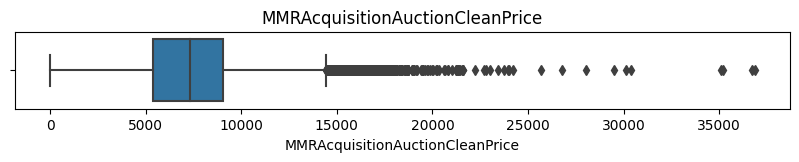

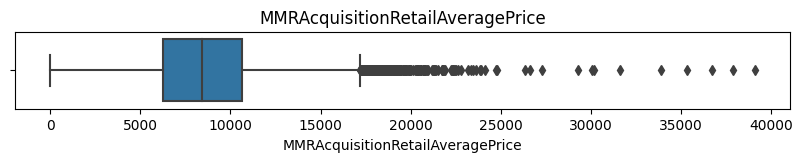

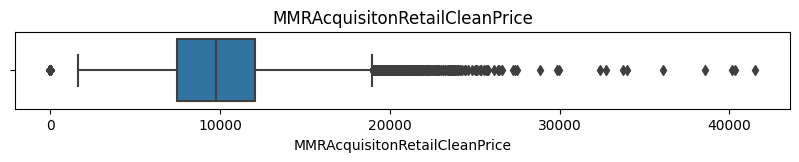

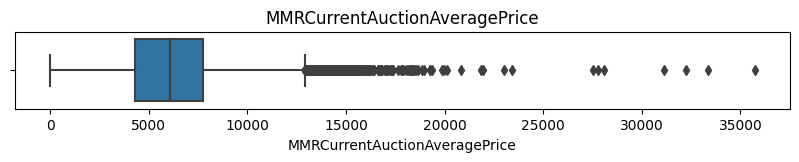

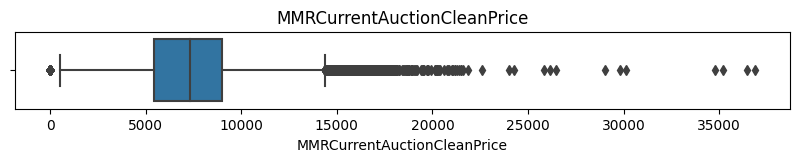

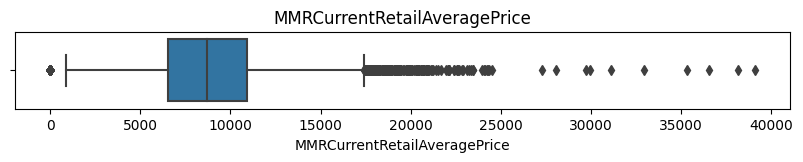

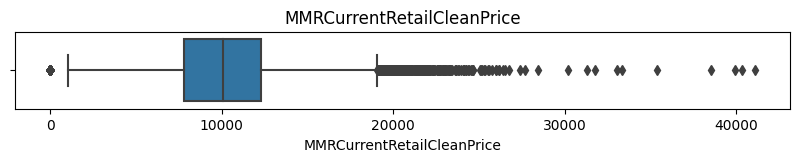

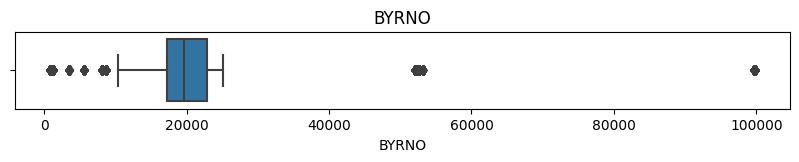

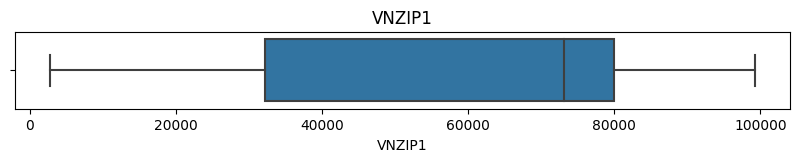

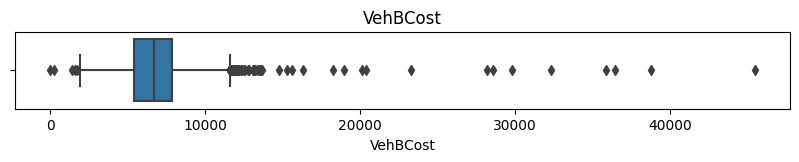

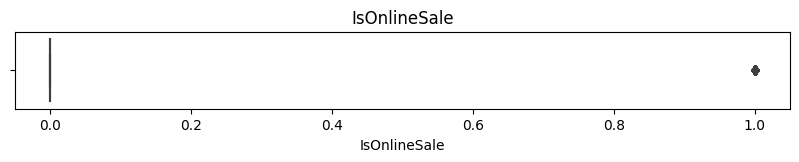

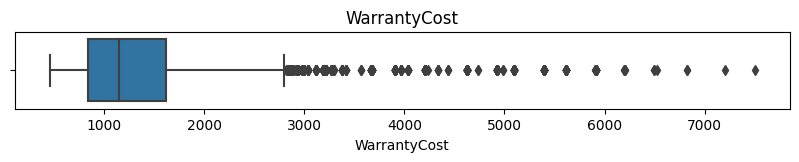

In [ ]:
# Individual Box Plots for each numeric feature
numeric_columns = data.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    plt.figure(figsize=(10, 1))  # Adjust the figure size as necessary
    sns.boxplot(x=data[column])
    plt.title(column)
    plt.show()


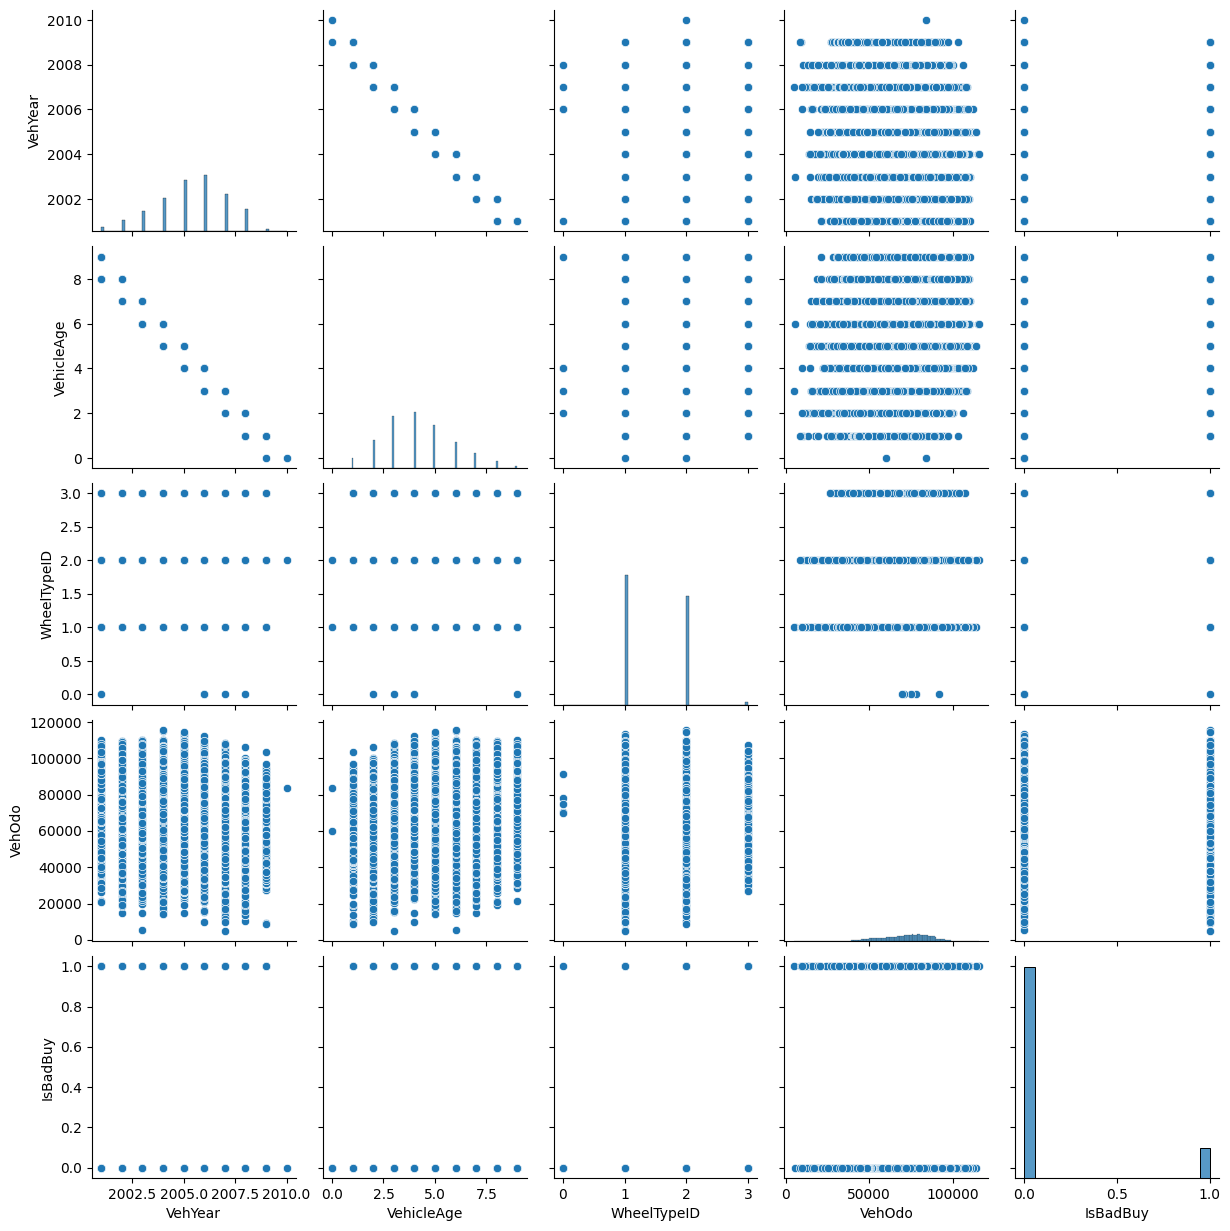

In [ ]:
# Select a subset of columns for the pair plot
subset_of_columns=['VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo','IsBadBuy']
sns.pairplot(data[subset_of_columns])
plt.show()


#Feature Encoding


In [ ]:
#Data Before
print(data.head())

   RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge   Make  \
0      1         0  12/7/2009   ADESA     2006           3  MAZDA   
1      2         0  12/7/2009   ADESA     2004           5  DODGE   
2      3         0  12/7/2009   ADESA     2005           4  DODGE   
3      4         0  12/7/2009   ADESA     2004           5  DODGE   
4      5         0  12/7/2009   ADESA     2005           4   FORD   

                 Model Trim           SubModel  ...  \
0               MAZDA3    i         4D SEDAN I  ...   
1  1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT  ...   
2           STRATUS V6  SXT   4D SEDAN SXT FFV  ...   
3                 NEON  SXT           4D SEDAN  ...   
4                FOCUS  ZX3       2D COUPE ZX3  ...   

  MMRCurrentAuctionAveragePrice MMRCurrentAuctionCleanPrice  \
0                        7451.0                      8552.0   
1                        7456.0                      9222.0   
2                        4035.0                      5557.0   
3 

In [ ]:
# Selecting categorical columns for one-hot encoding
categorical_columns = [ 'Transmission',  'Nationality', 'TopThreeAmericanName']

# Performing one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns)

# data_encoded now contains the original data with the specified categorical columns replaced by their one-hot encoded counterparts.

In [ ]:
# encoded data is stored in data_encoded
print(data_encoded.head())

   RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge   Make  \
0      1         0  12/7/2009   ADESA     2006           3  MAZDA   
1      2         0  12/7/2009   ADESA     2004           5  DODGE   
2      3         0  12/7/2009   ADESA     2005           4  DODGE   
3      4         0  12/7/2009   ADESA     2004           5  DODGE   
4      5         0  12/7/2009   ADESA     2005           4   FORD   

                 Model Trim           SubModel  ... Transmission_MANUAL  \
0               MAZDA3    i         4D SEDAN I  ...                   0   
1  1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT  ...                   0   
2           STRATUS V6  SXT   4D SEDAN SXT FFV  ...                   0   
3                 NEON  SXT           4D SEDAN  ...                   0   
4                FOCUS  ZX3       2D COUPE ZX3  ...                   1   

   Transmission_Manual Nationality_AMERICAN  Nationality_OTHER  \
0                    0                    0                  0   
1 

In [ ]:
print(data_encoded.columns)

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'WheelTypeID',
       'WheelType', 'VehOdo', 'Size', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'Transmission_AUTO',
       'Transmission_MANUAL', 'Transmission_Manual', 'Nationality_AMERICAN',
       'Nationality_OTHER', 'Nationality_OTHER ASIAN',
       'Nationality_TOP LINE ASIAN', 'TopThreeAmericanName_CHRYSLER',
       'TopThreeAmericanName_FORD', 'TopThreeAmericanName_GM',
       'TopThreeAmericanName_OTHER'],
      dtype='object')


##Checking for outliers

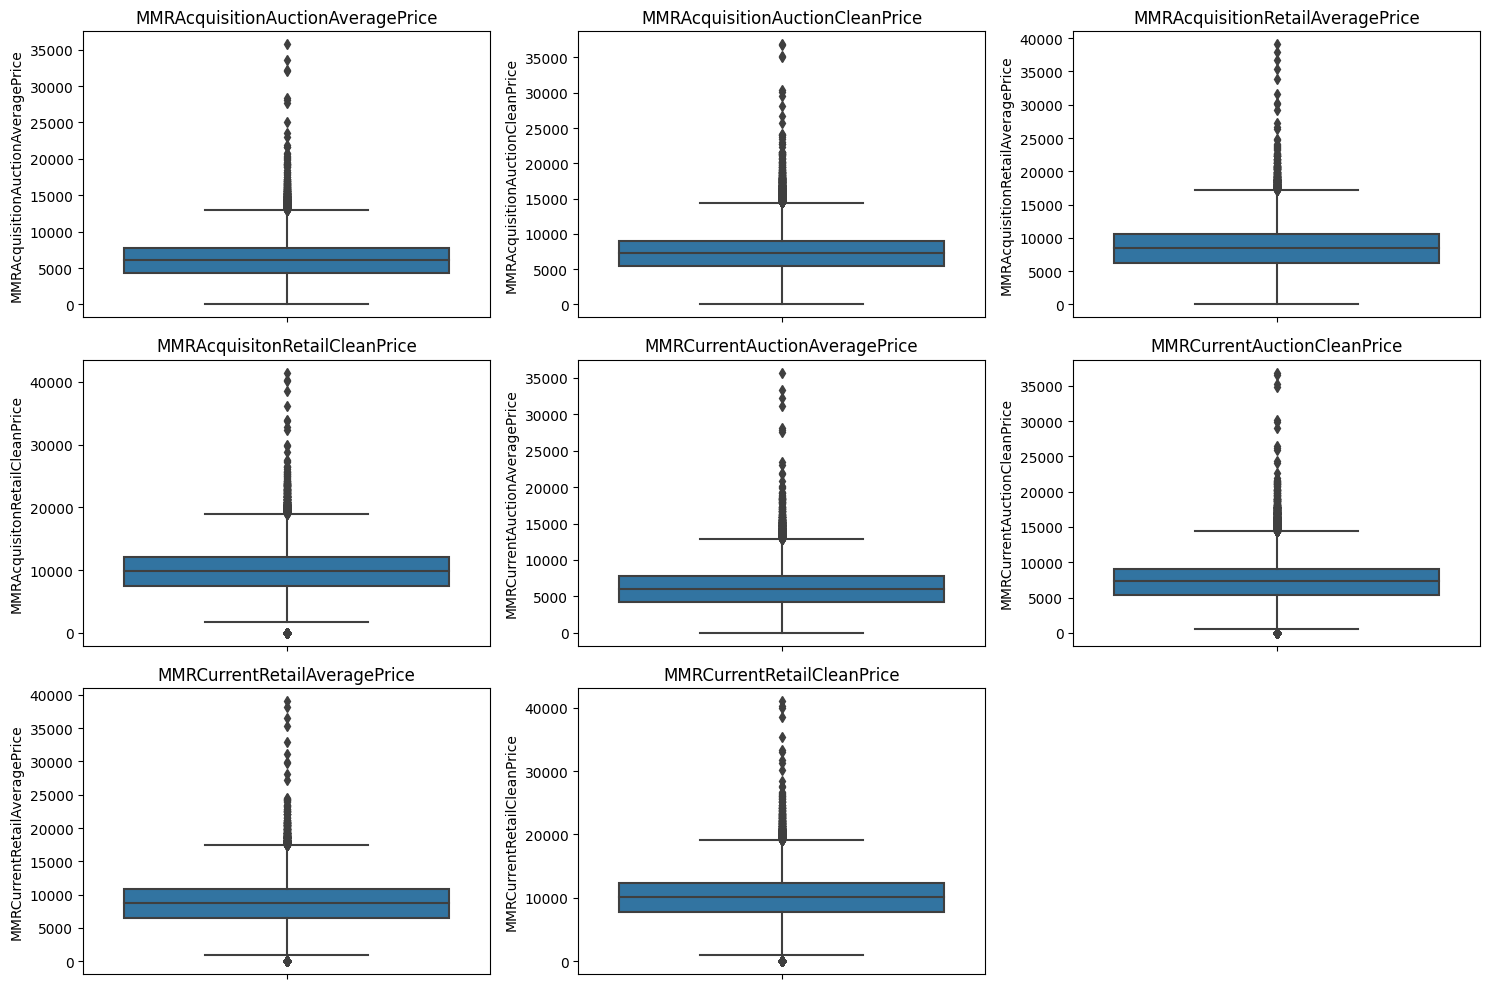

In [ ]:


# [Apply the preprocessing steps here]

# Identifying numeric columns
numeric_columns = data_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Removing columns that are not of interest
numeric_columns = [col for col in numeric_columns if col in [
    'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
    'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
    'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
    'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']]

# Visualizing outliers using box plots
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)  # Adjust the subplot grid as needed
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


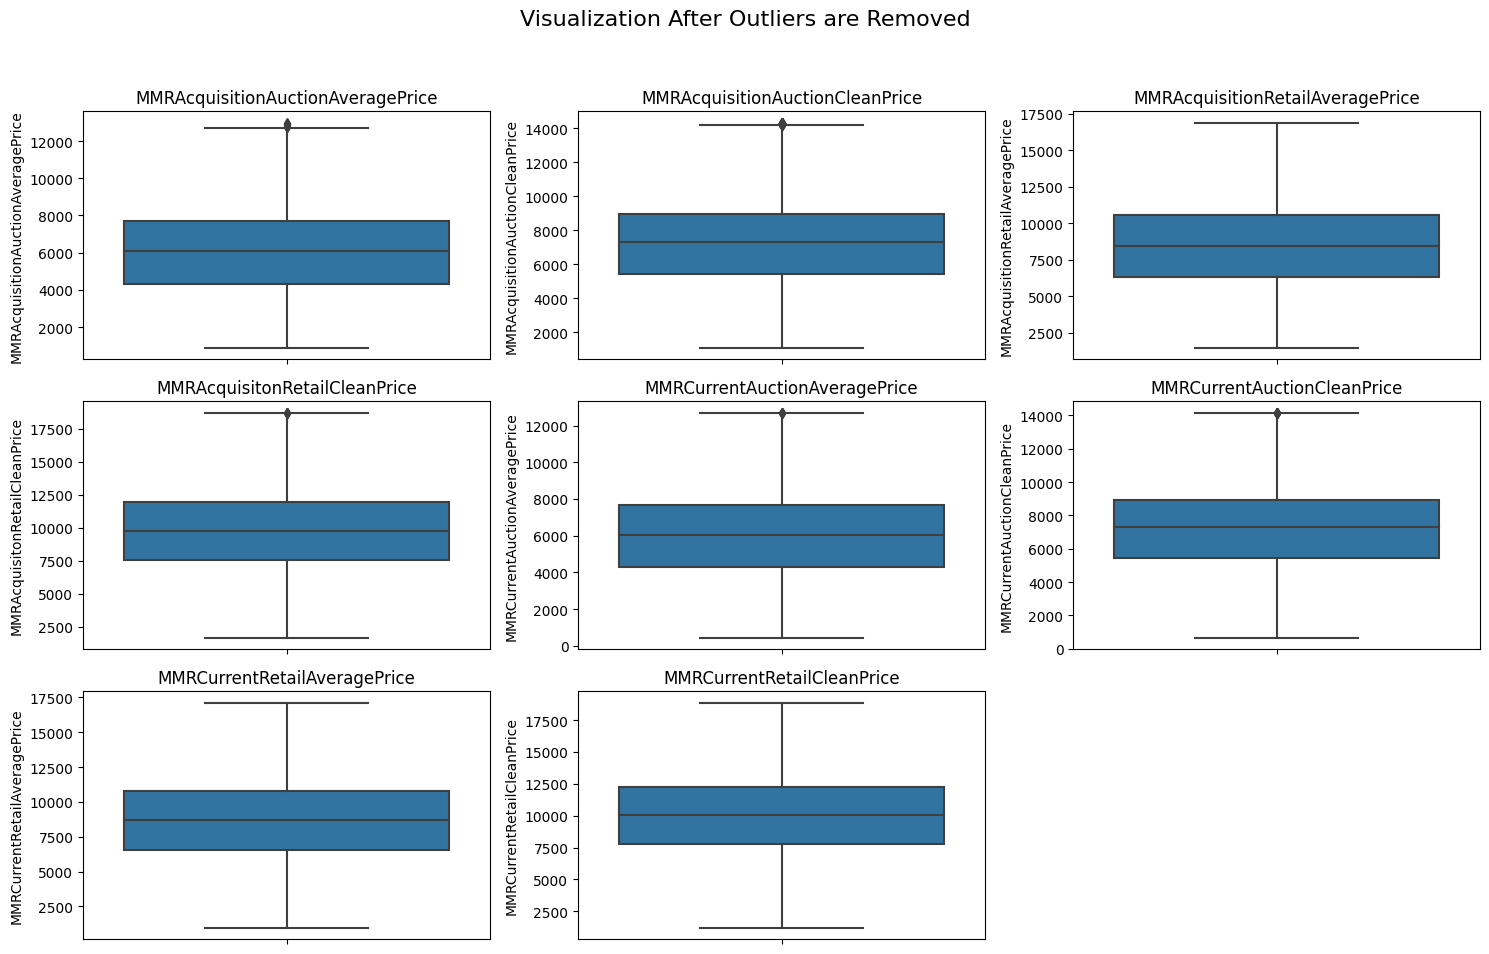

In [ ]:


# Function to remove outliers using IQR
def remove_outliers_iqr(df, numeric_columns):
    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[numeric_columns] >= lower_bound) & (df[numeric_columns] <= upper_bound)]

# Creating a copy of the dataset for comparison
data_filtered = data_encoded.copy()

# Removing outliers from each numeric column in the copied dataset
for col in numeric_columns:
    data_filtered = remove_outliers_iqr(data_filtered, col)

# Visualization of all numerical columns after outlier removal
plt.figure(figsize=(15, 10))  # Increase figure size as needed

# Adjust the number of rows and columns in the subplot grid as needed
num_rows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=data_filtered[col])
    plt.title(col)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
    plt.tight_layout()  # Adjust subplot params

plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust horizontal and vertical spacing
plt.suptitle("Visualization After Outliers are Removed", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to accommodate the title
plt.show()


In [ ]:
#Data Before
print(data_filtered.head())

   RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge   Make  \
0      1         0  12/7/2009   ADESA     2006           3  MAZDA   
1      2         0  12/7/2009   ADESA     2004           5  DODGE   
2      3         0  12/7/2009   ADESA     2005           4  DODGE   
3      4         0  12/7/2009   ADESA     2004           5  DODGE   
4      5         0  12/7/2009   ADESA     2005           4   FORD   

                 Model Trim           SubModel  ... Transmission_MANUAL  \
0               MAZDA3    i         4D SEDAN I  ...                   0   
1  1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT  ...                   0   
2           STRATUS V6  SXT   4D SEDAN SXT FFV  ...                   0   
3                 NEON  SXT           4D SEDAN  ...                   0   
4                FOCUS  ZX3       2D COUPE ZX3  ...                   1   

   Transmission_Manual Nationality_AMERICAN  Nationality_OTHER  \
0                    0                    0                  0   
1 

<ipython-input-22-44a2edde649b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_filtered.corr()


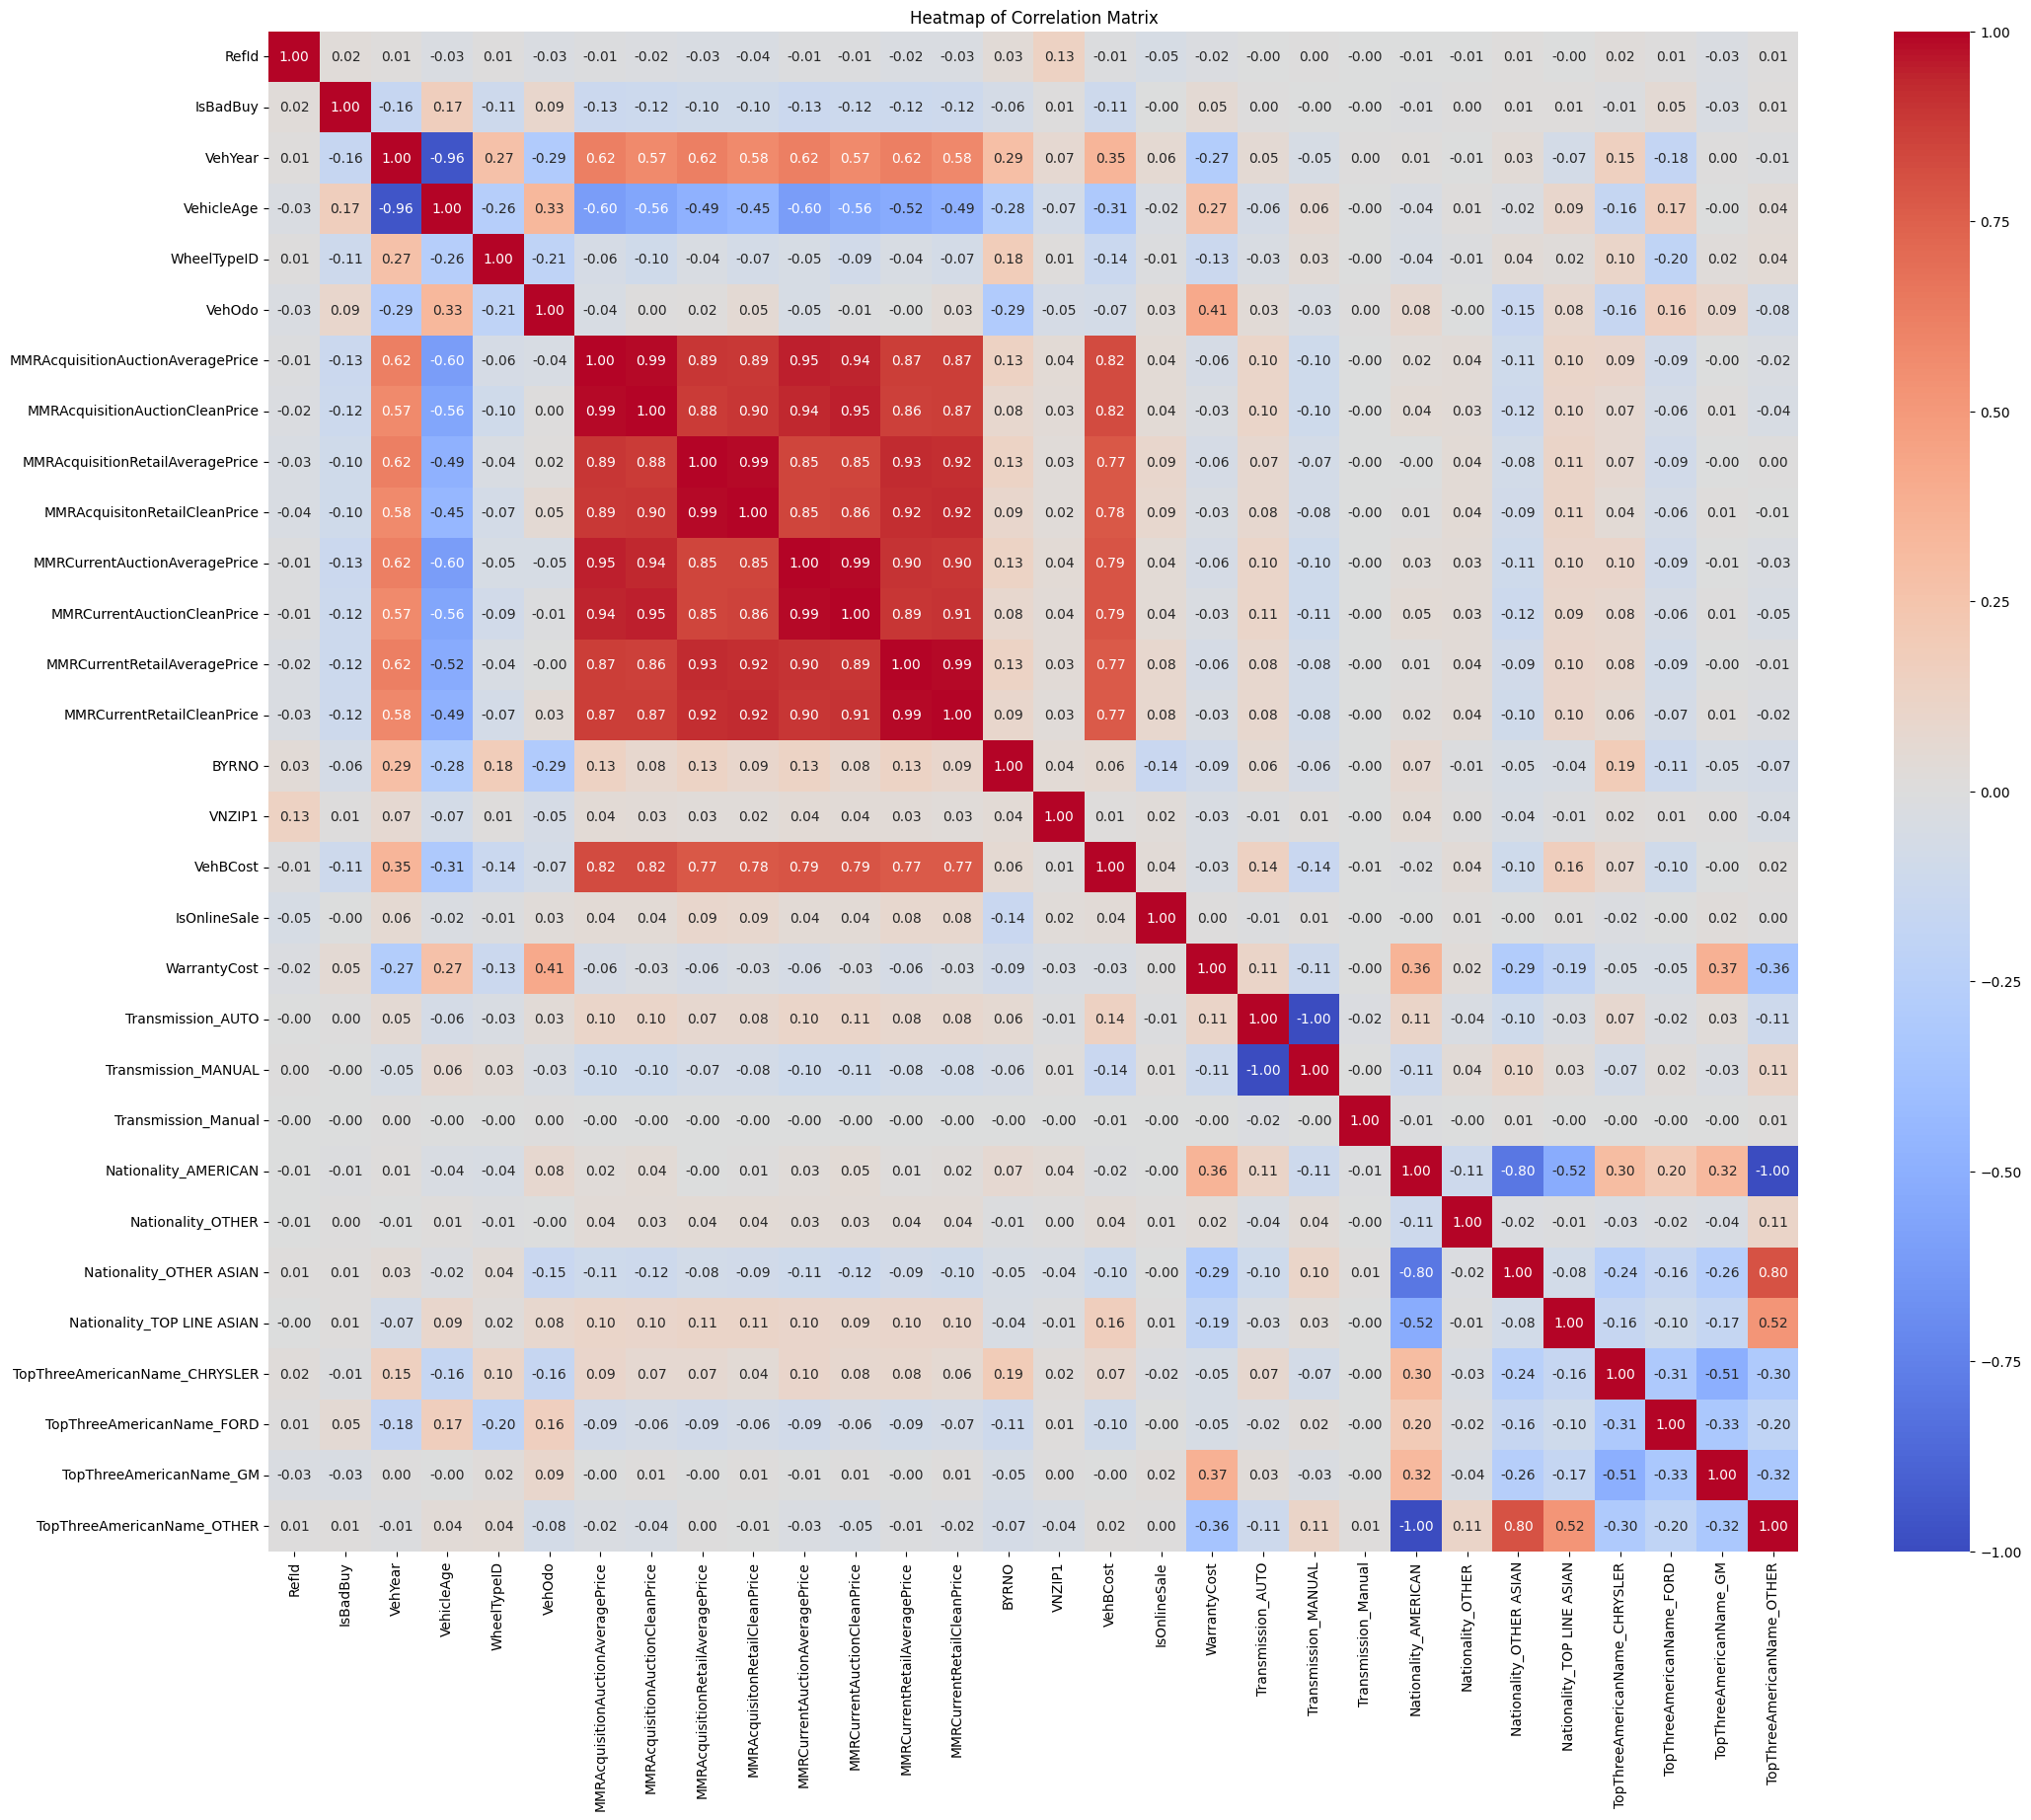

In [ ]:
# Calculate the correlation matrix
corr_matrix = data_filtered.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(25, 20))  # You can adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
#feature selection using correlation matrix


#Calculate the correlation matrix
correlation_matrix = data_filtered.corr()

# Assuming 'IsBadBuy' is the target variable
target_variable = 'IsBadBuy'

# Set a threshold for selecting features (e.g., 0.1)
threshold = 0.08

# Find features with correlation above the threshold
selected_features = correlation_matrix.index[abs(correlation_matrix[target_variable]) > threshold]

# Remove the target variable from the selected features
selected_features = selected_features.drop(target_variable)

print("Selected features based on the correlation coefficient:")
print(selected_features)


<ipython-input-23-c421bb39cbd1>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_filtered.corr()


Selected features based on the correlation coefficient:
Index(['VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost'],
      dtype='object')


In [ ]:
# Extracting the data for the selected features
PreprocesssedData = data_filtered[selected_features]

print("Data for the selected features:")
print(PreprocesssedData.columns)


Data for the selected features:
Index(['VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost'],
      dtype='object')


In [ ]:
# Splitting data
X = PreprocesssedData
y = data_filtered['IsBadBuy']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.columns

Index(['VehYear', 'VehicleAge', 'WheelTypeID', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost'],
      dtype='object')

# Using decision tree.

In [ ]:

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred_de = classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_de))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_de))
print("Classification Report:\n", classification_report(y_test, y_pred_de))


Accuracy: 0.7860973888496824
Confusion Matrix:
 [[10772  1646]
 [ 1385   367]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     12418
           1       0.18      0.21      0.19      1752

    accuracy                           0.79     14170
   macro avg       0.53      0.54      0.54     14170
weighted avg       0.80      0.79      0.79     14170





# LOGISTIC REGRESSION MODEL



In [ ]:
# Initialize the Logistic Regression model
classifier = LogisticRegression(solver='liblinear')

# Fit the model
classifier.fit(X_train, y_train)

# Predictions
y_pred_log = classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Accuracy: 0.8763585038814397
Confusion Matrix:
 [[12418     0]
 [ 1752     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     12418
           1       0.00      0.00      0.00      1752

    accuracy                           0.88     14170
   macro avg       0.44      0.50      0.47     14170
weighted avg       0.77      0.88      0.82     14170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




# RANDOM FOREST



In [ ]:
# Initialize the Random Forest classifier with fewer trees and limited depth
classifier = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)  # Reduced complexity

# Fit the model
classifier.fit(X_train, y_train)

# Predictions
y_pred_ran = classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_ran))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ran))
print("Classification Report:\n", classification_report(y_test, y_pred_ran))

Accuracy: 0.8763585038814397
Confusion Matrix:
 [[12418     0]
 [ 1752     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     12418
           1       0.00      0.00      0.00      1752

    accuracy                           0.88     14170
   macro avg       0.44      0.50      0.47     14170
weighted avg       0.77      0.88      0.82     14170



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



# XGBOOST CLASSIFIER



In [ ]:
# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8750882145377559
Confusion Matrix:
 [[12342    76]
 [ 1694    58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     12418
           1       0.43      0.03      0.06      1752

    accuracy                           0.88     14170
   macro avg       0.66      0.51      0.50     14170
weighted avg       0.82      0.88      0.83     14170



In [ ]:
# Initialize XGBoost classifier with adjusted parameters
xgb_classifier = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=50,    # Reduced number of trees
    max_depth=5         # Reduced depth of each tree
)

# Fit the model
xgb_classifier.fit(X_train, y_train)

# Predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8755822159491884
Confusion Matrix:
 [[12393    25]
 [ 1738    14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     12418
           1       0.36      0.01      0.02      1752

    accuracy                           0.88     14170
   macro avg       0.62      0.50      0.47     14170
weighted avg       0.81      0.88      0.82     14170



In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Parameter grid for XGBoost
param_grid = {
    'xgbclassifier__n_estimators': [100],
    'xgbclassifier__learning_rate': [0.01],
    'xgbclassifier__max_depth': [3],
    'xgbclassifier__min_child_weight': [1],
    'xgbclassifier__gamma': [0],
    'xgbclassifier__subsample': [0.8],
    'xgbclassifier__colsample_bytree': [0.8]
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# fit the model
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:03:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "xgbclassifier__colsample_bytree", "xgbclassifier__gamma", "xgbclassifier__learning_rate", "xgbclassifier__max_depth", "xgbclassifier__min_child_weight", "xgbclassifier__n_estimators", "xgbclassifier__subsample" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__gamma': 0, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 3, 'xgbclassifier__min_child_weight': 1, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__subsample': 0.8}
Best Score: 0.8740957677578914
Accuracy: 0.8750882145377559
Confusion Matrix:
 [[12342    76]
 [ 1694    58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     12418
           1       0.43      0.03      0.06      1752

    accuracy                           0.88     14170
   macro avg       0.66      0.51      0.50     14170
weighted avg       0.82      0.88      0.83     14170



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint

# Parameter distributions for XGBoost
param_distributions = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'min_child_weight': randint(1, 6),
    'gamma': uniform(0, 0.5),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4)
}

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_distributions,
                                   n_iter=100, cv=3, verbose=2, n_jobs=-1, random_state=0)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)
# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_distributions,
                                   n_iter=100, cv=3, verbose=2, n_jobs=-1, random_state=0)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)
# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Best estimator
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions with the best model

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'colsample_bytree': 0.6423624619528928, 'gamma': 0.47547630552769704, 'learning_rate': 0.056684051093619264, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 84, 'subsample': 0.8922836396509904}
Best Score: 0.8773068952220711
Accuracy: 0.8769936485532815
Confusion Matrix:
 [[12414     4]
 [ 1739    13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     12418
           1       0.76      0.01      0.01      1752

    accuracy                           0.88     14170
   macro avg       0.82      0.50      0.47     14170
weighted avg       0.86      0.88      0.82     14170

